# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv('cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


# EDA and Graphical analysis

In [5]:
df.shape

(103, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [6]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [7]:
df.sample(30) # in order to check do we have correct data for the columns

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
49,326.000,0.000,167.000,174.000,6.000,884.000,792.000,21.500,42.000,52.650
25,140.000,128.000,164.000,183.000,12.000,871.000,775.000,23.750,53.000,33.380
12,142.000,130.000,167.000,215.000,6.000,735.000,836.000,25.500,67.000,31.370
36,252.000,76.000,97.000,194.000,8.000,835.000,821.000,23.000,54.000,33.110
88,150.400,110.900,239.700,168.100,6.500,1000.200,667.200,9.500,27.500,37.920
60,278.000,0.000,117.000,205.000,9.000,875.000,799.000,19.000,48.000,32.710
68,320.000,127.000,164.000,211.000,6.000,721.000,723.000,2.000,20.000,46.360
76,159.000,0.000,187.000,176.000,11.000,990.000,789.000,12.000,39.000,32.570
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
63,291.000,104.000,0.000,231.000,9.000,857.000,725.000,23.000,69.000,30.430


In [24]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [23]:
df.corr()[['Compressive Strength (28-day)(Mpa)']]

,Compressive Strength (28-day)(Mpa)
Cement,0.446
Slag,-0.332
Fly ash,0.444
Water,-0.254
SP,-0.038
Coarse Aggr.,-0.161
Fine Aggr.,-0.155
SLUMP(cm),-0.223
FLOW(cm),-0.124
Compressive Strength (28-day)(Mpa),1.000


In [87]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

<AxesSubplot:>

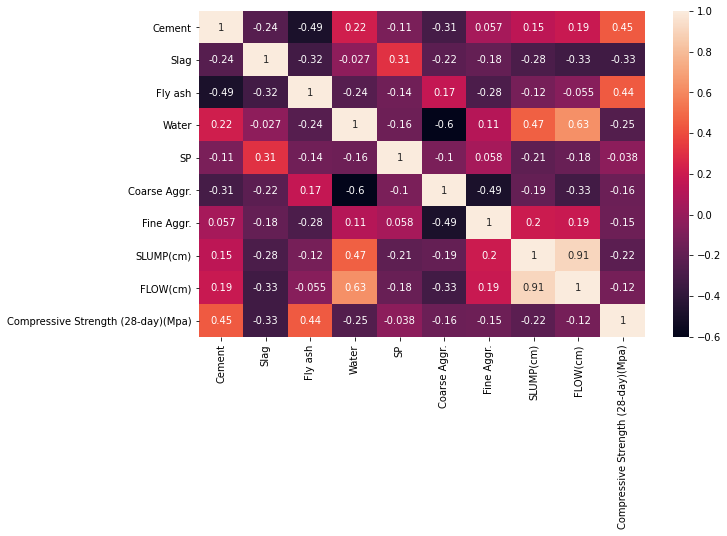

In [8]:
sns.heatmap(df.corr(), annot=True)

In [31]:
for columnx in df.columns:
    for columny in df.columns:
        
        if columnx != columny and df[columnx].corr(df[columny]) > 0.9:
            print(f'{columnx} has more correlation {df[columnx].corr(df[columny])} to to the column {columny}')
        

SLUMP(cm) has more correlation 0.9061345366873963 to to the column FLOW(cm)
FLOW(cm) has more correlation 0.9061345366873963 to to the column SLUMP(cm)


<p style='font-size: 20px; color:yellow'> In this case multicolineratiy I need to choose one of the measure in order to have a good model for target column I will choose the high relation for target column</p>

In [51]:
df[['Compressive Strength (28-day)(Mpa)','FLOW(cm)','SLUMP(cm)']].corr()

,Compressive Strength (28-day)(Mpa),FLOW(cm),SLUMP(cm)
Compressive Strength (28-day)(Mpa),1.000,-0.124,-0.223
FLOW(cm),-0.124,1.000,0.906
SLUMP(cm),-0.223,0.906,1.000


In [52]:
df = df.drop(columns='FLOW(cm)')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(9)
memory usage: 7.4 KB


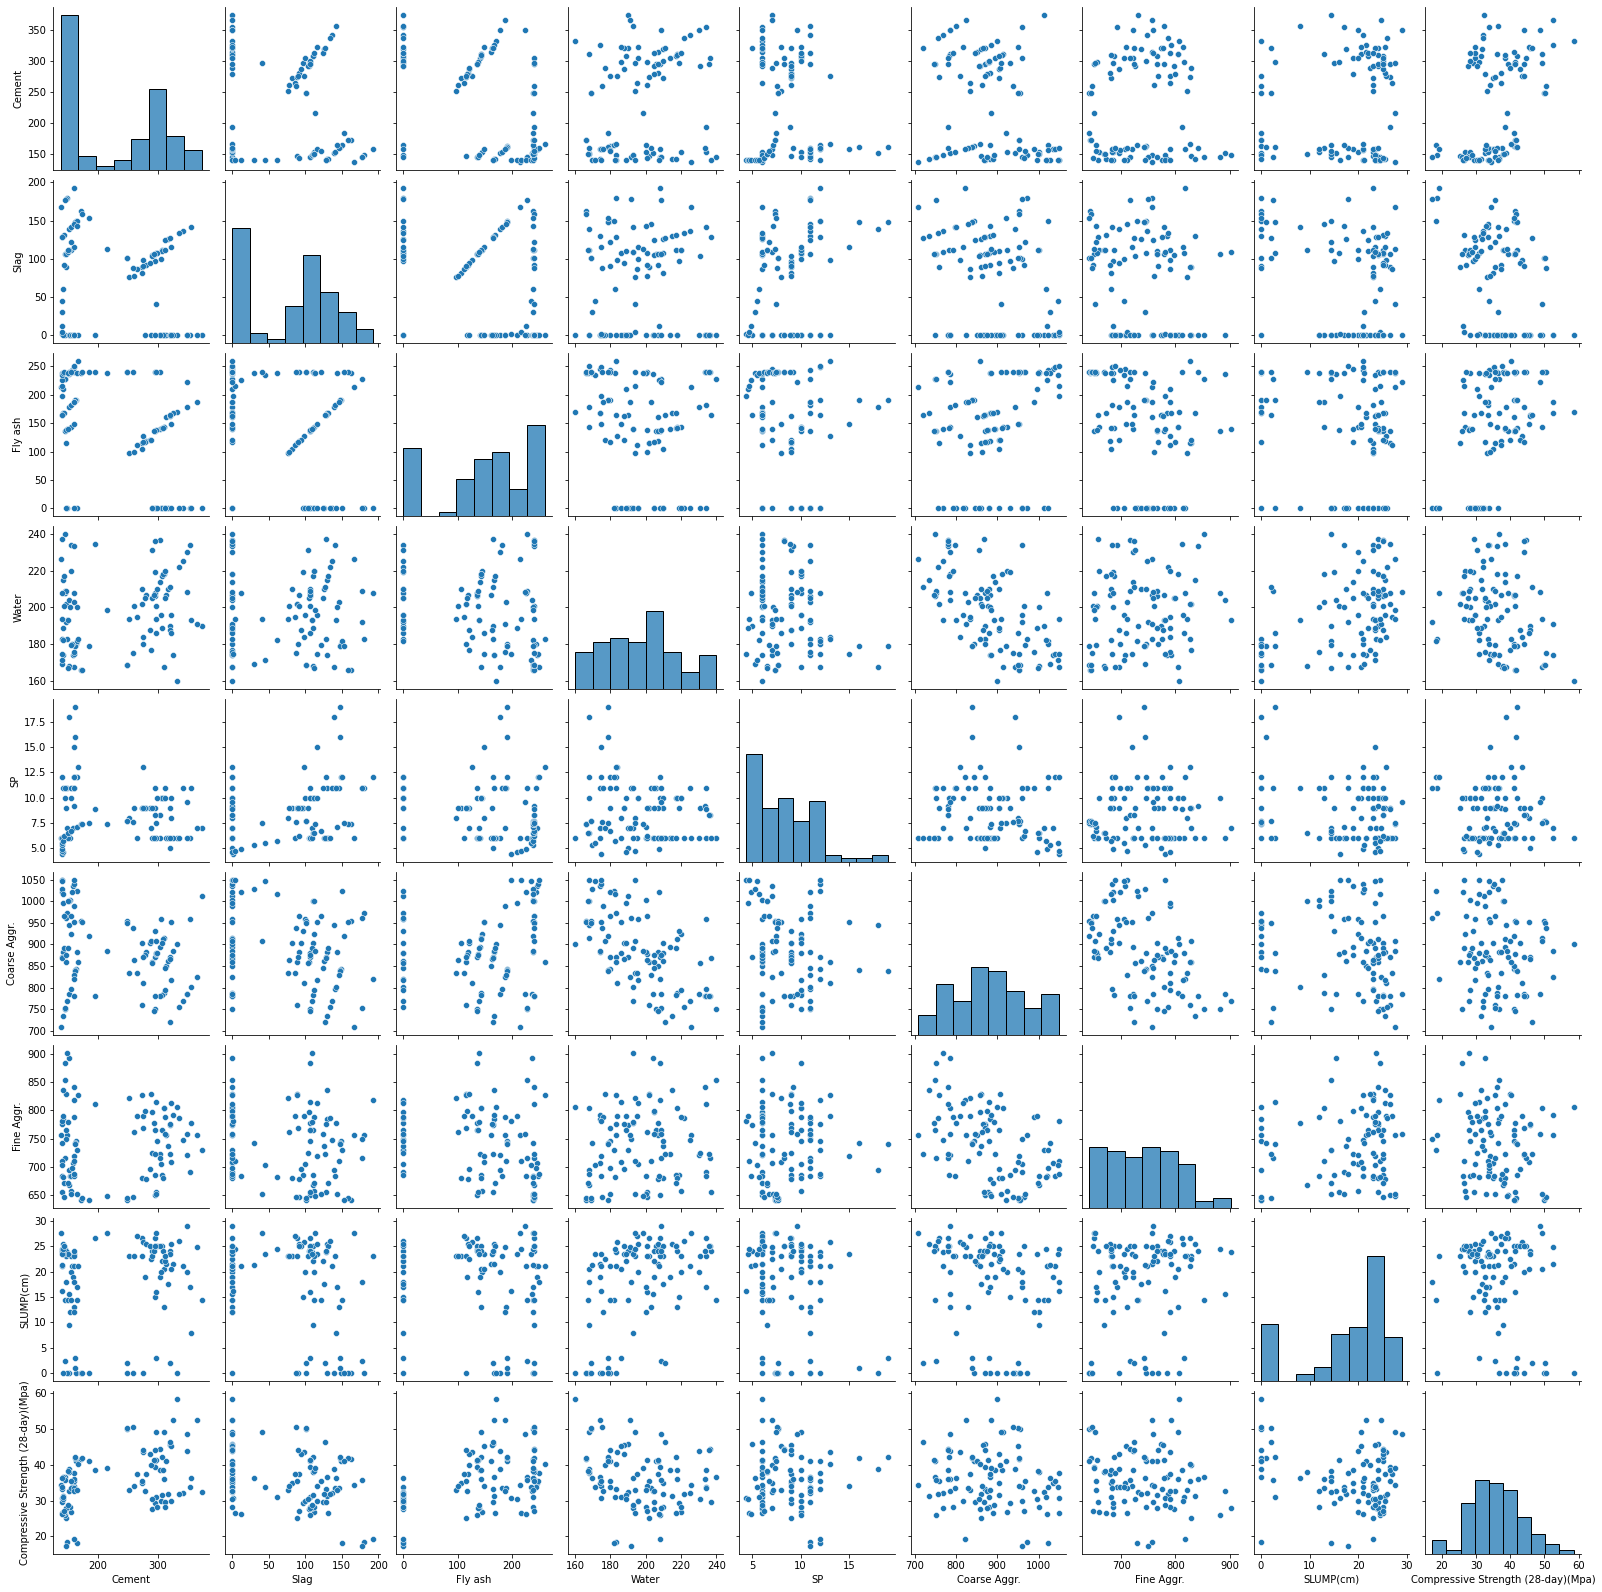

In [54]:
sns.pairplot(df)


# Data Preprocessing 

### Features and target variable

In [55]:
X = df.drop(columns='Compressive Strength (28-day)(Mpa)')
y = df['Compressive Strength (28-day)(Mpa)']

In [56]:
X.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000


In [57]:
y.head()

0   34.990
1   41.140
2   41.810
3   42.080
4   26.820
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Splitting data into training and testing

In [58]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
for i in [X_train, y_train, X_test, y_test]:
    print(f'shape {i.shape}')

shape (72, 8)
shape (72,)
shape (31, 8)
shape (31,)


## Scaling

<p style='font-size: 20px; color:yellow'> Features have diffent measures that is why we need to shrink them to the same level of measure</p>

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [67]:
scaler.fit(X_train)

StandardScaler()

In [68]:
X_train_scaled = scaler.transform(X_train)

In [75]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7
mean,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [69]:
X_test_scaled = scaler.transform(X_test)

In [76]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [77]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()

### 1.1 Interpret the model

In [78]:
lm_model.fit(X_train_scaled,y_train)

LinearRegression()

In [79]:
y_pred = lm_model.predict(X_test_scaled)

In [80]:
y_train_pred = lm_model.predict(X_train_scaled)

### 1.2 Model Evaluation

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [98]:
lm = train_val(y_train, y_train_pred, y_test, y_pred,'linear')
lm

,linear_train,linear_test
R2,0.896,0.917
mae,1.991,1.737
mse,6.505,4.669
rmse,2.550,2.161


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [90]:
from sklearn.linear_model import RidgeCV

In [91]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [92]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [93]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [94]:
ridge_cv_model.alpha_

0.43

In [95]:
ridge_cv_model.best_score_

-2.7255335001279173

In [96]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [99]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
ridge

,ridge_cv_train,ridge_cv_test
R2,0.896,0.917
mae,1.991,1.737
mse,6.505,4.669
rmse,2.550,2.161


## 2.2 Lasso (Apply and evalute)

In [101]:
from sklearn.linear_model import LassoCV

In [102]:
lasso_cv_model = LassoCV()

In [107]:
alpha_space_lasso = np.linspace(0.001,0.01,100)
alpha_space_lasso

array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0.00381818, 0.00390909, 0.004     , 0.00409091,
       0.00418182, 0.00427273, 0.00436364, 0.00445455, 0.00454545,
       0.00463636, 0.00472727, 0.00481818, 0.00490909, 0.005     ,
       0.00509091, 0.00518182, 0.00527273, 0.00536364, 0.00545455,
       0.00554545, 0.00563636, 0.00572727, 0.00581818, 0.00590909,
       0.006     , 0.00609091, 0.00618182, 0.00627273, 0.00636364,
       0.00645455, 0.00654545, 0.00663636, 0.00672727, 0.00681818,
       0.00690909, 0.007     , 0.00709091, 0.00718182, 0.00727273,
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772

In [108]:
lasso_cv_model = LassoCV(alphas = alpha_space_lasso, cv = 5, max_iter=100000, random_state=42) 

In [109]:
lasso_cv_model.fit(X_train_scaled,y_train)

LassoCV(alphas=array([0.001     , 0.00109091, 0.00118182, 0.00127273, 0.00136364,
       0.00145455, 0.00154545, 0.00163636, 0.00172727, 0.00181818,
       0.00190909, 0.002     , 0.00209091, 0.00218182, 0.00227273,
       0.00236364, 0.00245455, 0.00254545, 0.00263636, 0.00272727,
       0.00281818, 0.00290909, 0.003     , 0.00309091, 0.00318182,
       0.00327273, 0.00336364, 0.00345455, 0.00354545, 0.00363636,
       0.00372727, 0....
       0.00736364, 0.00745455, 0.00754545, 0.00763636, 0.00772727,
       0.00781818, 0.00790909, 0.008     , 0.00809091, 0.00818182,
       0.00827273, 0.00836364, 0.00845455, 0.00854545, 0.00863636,
       0.00872727, 0.00881818, 0.00890909, 0.009     , 0.00909091,
       0.00918182, 0.00927273, 0.00936364, 0.00945455, 0.00954545,
       0.00963636, 0.00972727, 0.00981818, 0.00990909, 0.01      ]),
        cv=5, max_iter=100000, random_state=42)

In [110]:
lasso_cv_model.alpha_

0.00790909090909091

In [112]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [113]:
lasso = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lasso

,lasso_cv_train,lasso_cv_test
R2,0.896,0.917
mae,1.990,1.738
mse,6.491,4.690
rmse,2.548,2.166


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [115]:
from sklearn.linear_model import ElasticNetCV

In [116]:
alpha_space_el = np.linspace(0.001,0.1,200)

In [117]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space_el, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [118]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.001     , 0.00149749, 0.00199497, 0.00249246, 0.00298995,
       0.00348744, 0.00398492, 0.00448241, 0.0049799 , 0.00547739,
       0.00597487, 0.00647236, 0.00696985, 0.00746734, 0.00796482,
       0.00846231, 0.0089598 , 0.00945729, 0.00995477, 0.01045226,
       0.01094975, 0.01144724, 0.01194472, 0.01244221, 0.0129397 ,
       0.01343719, 0.01393467, 0.01443216, 0.01492965, 0.01542714,
       0...
       0.08557286, 0.08607035, 0.08656784, 0.08706533, 0.08756281,
       0.0880603 , 0.08855779, 0.08905528, 0.08955276, 0.09005025,
       0.09054774, 0.09104523, 0.09154271, 0.0920402 , 0.09253769,
       0.09303518, 0.09353266, 0.09403015, 0.09452764, 0.09502513,
       0.09552261, 0.0960201 , 0.09651759, 0.09701508, 0.09751256,
       0.09801005, 0.09850754, 0.09900503, 0.09950251, 0.1       ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [119]:
elastic_cv_model.alpha_

0.011447236180904524

In [120]:
y_train_pred = elastic_cv_model.predict(X_train_scaled)
y_pred = elastic_cv_model.predict(X_test_scaled)

In [121]:
elastic = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
elastic

,elastic_cv_train,elastic_cv_test
R2,0.896,0.917
mae,1.994,1.734
mse,6.526,4.658
rmse,2.555,2.158


In [124]:
pd.concat([lm,ridge, lasso, elastic], axis=1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test
R2,0.896,0.917,0.896,0.917,0.896,0.917,0.896,0.917
mae,1.991,1.737,1.991,1.737,1.990,1.738,1.994,1.734
mse,6.505,4.669,6.505,4.669,6.491,4.690,6.526,4.658
rmse,2.550,2.161,2.550,2.161,2.548,2.166,2.555,2.158
